# 1. Введение в анализ данных

## 1.1 Импорты

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Загрузка данных

In [2]:
df = pd.read_json('data/train.json')

In [3]:
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


## 1.3 Определение размера данных

In [4]:
shape = df.shape
all_str = shape[0]
print(f'В исходной таблице {shape[0]} строк и {shape[1]} столбцов')

В исходной таблице 49352 строк и 15 столбцов


## 1.4 Список столбцов

In [5]:
my_columns = []
print('В исходной таблице имеются следующие столбцы:')
for i in df.columns:
    my_columns.append(i)
my_columns

В исходной таблице имеются следующие столбцы:


['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

Целевой переменной является столбец 'price' - стоимость жилья

## 1.5 Анализ исходных данных

### C помощью info() определяем какие типы данных содержатся в каждом столбце, а также проверяем наличие пропущенных значений

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


### C помощью describe() получаем статистическое описание числовых признаков

In [7]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


### C помощью corr() выявляем взаимосвязь между числовыми признаками

In [8]:
df.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


## 1.6 Создание датафрейма с столбцами 'bathrooms', 'bedrooms' и 'interest_level', а также целевым столбцом 'price'

(Целевой столбец - это столбец в наборе данных, который является целью предсказания в модели машинного обучения)

In [9]:
df_filtered = df[['bathrooms', 'bedrooms', 'interest_level', 'price']]
df_filtered

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


# 2. Статистический анализ данных

## 2.1 Анализ цели

### Построение гистограммы

Устанавливаем размер всех графиков по умолчанию равный 15 на 8 дюймов

In [10]:
plt.rcParams['figure.figsize'] = (15, 8)

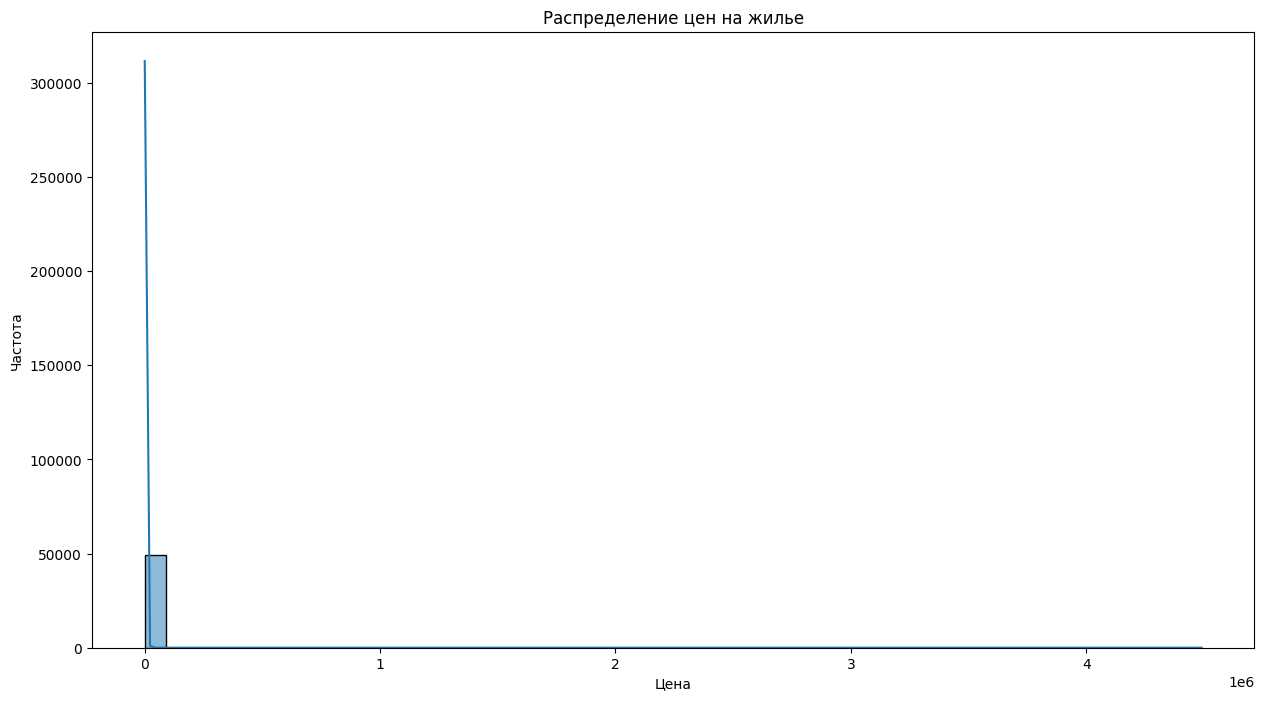

In [11]:
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на жилье')
plt.show()

### Построение boxplot

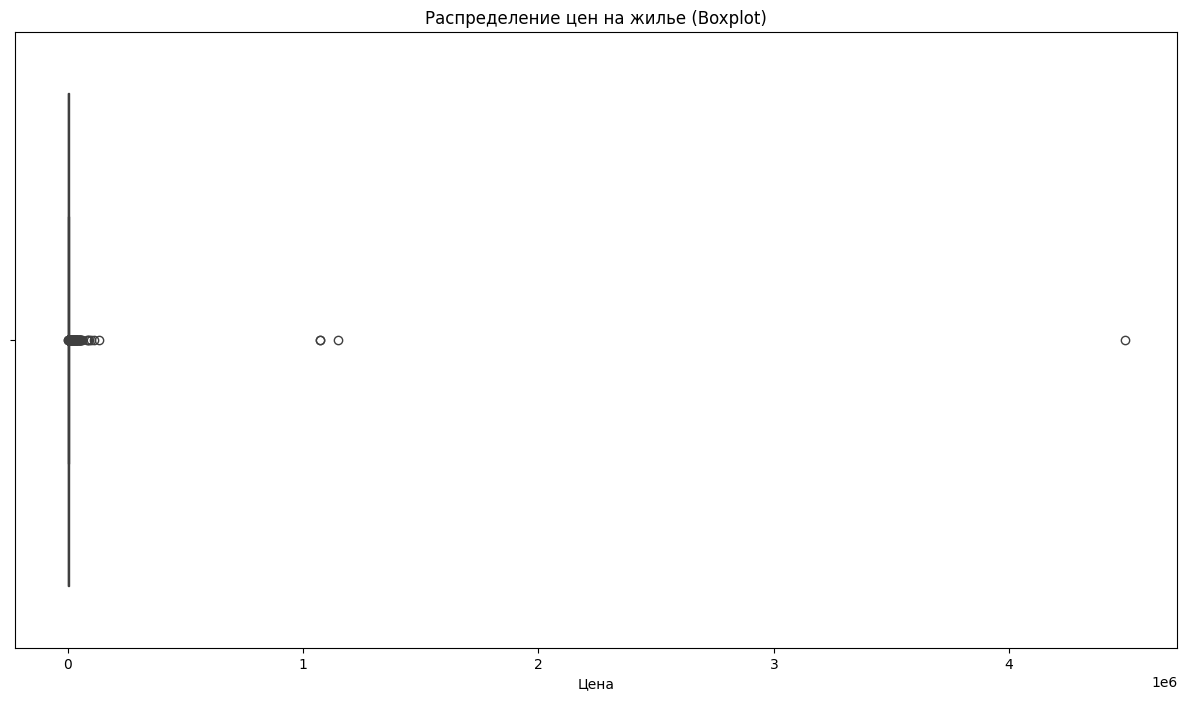

In [12]:
sns.boxplot(x=df_filtered['price'])
plt.xlabel('Цена')
plt.title('Распределение цен на жилье (Boxplot)')
plt.show()

Есть несколько выбросов которые намного превышают основной пул значений

### Удаление выбросов, находящихся за пределами 1-го и 99-го процентилей

In [13]:
low, high = df_filtered['price'].quantile([0.01, 0.99])
df_filtered = df_filtered[(df_filtered['price'] >= low) & (df_filtered['price'] <= high)]

In [14]:
df_filtered_shape = df_filtered.shape
df_filtered_shape

(48379, 4)

In [15]:
print(f'{all_str - df_filtered_shape[0]} выбросов удалено')

973 выбросов удалено


### Повторное построение гистограммы

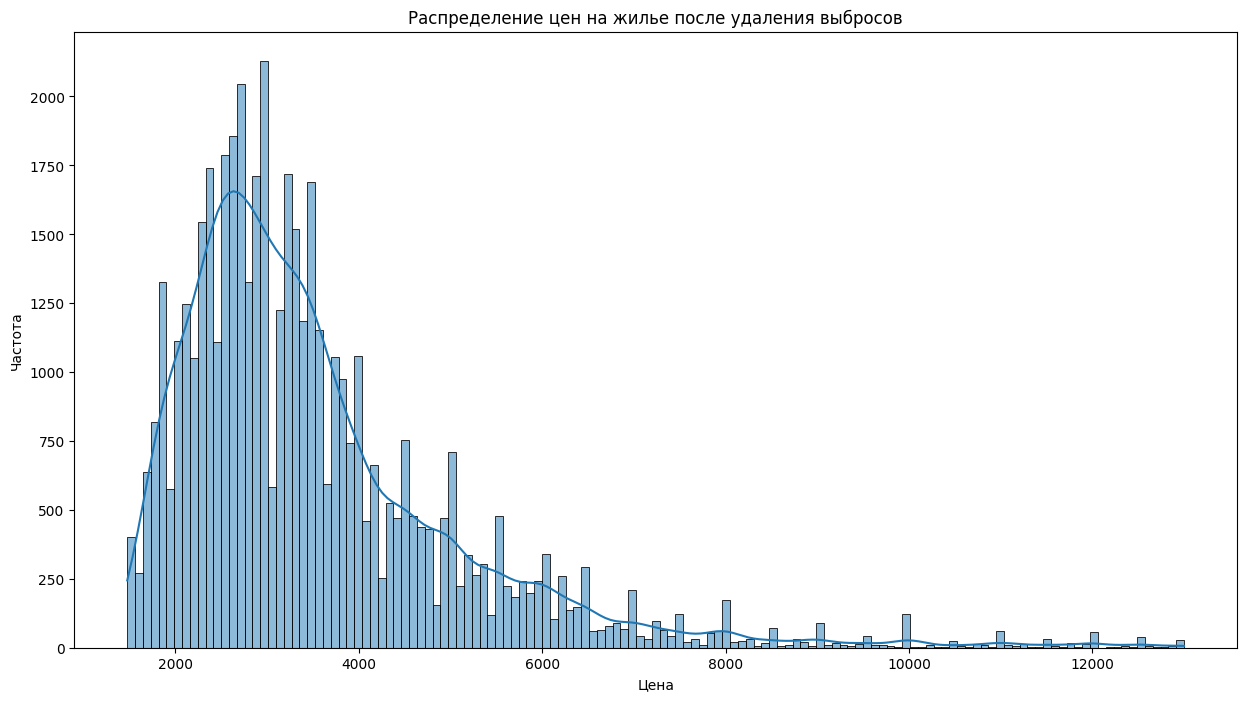

In [16]:
sns.histplot(df_filtered['price'], kde=True)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на жилье после удаления выбросов')
plt.show()

Большая часть цен находится в диапазоне от 2000 до 4000, но есть и более дорогие варианты с ценой более 12000

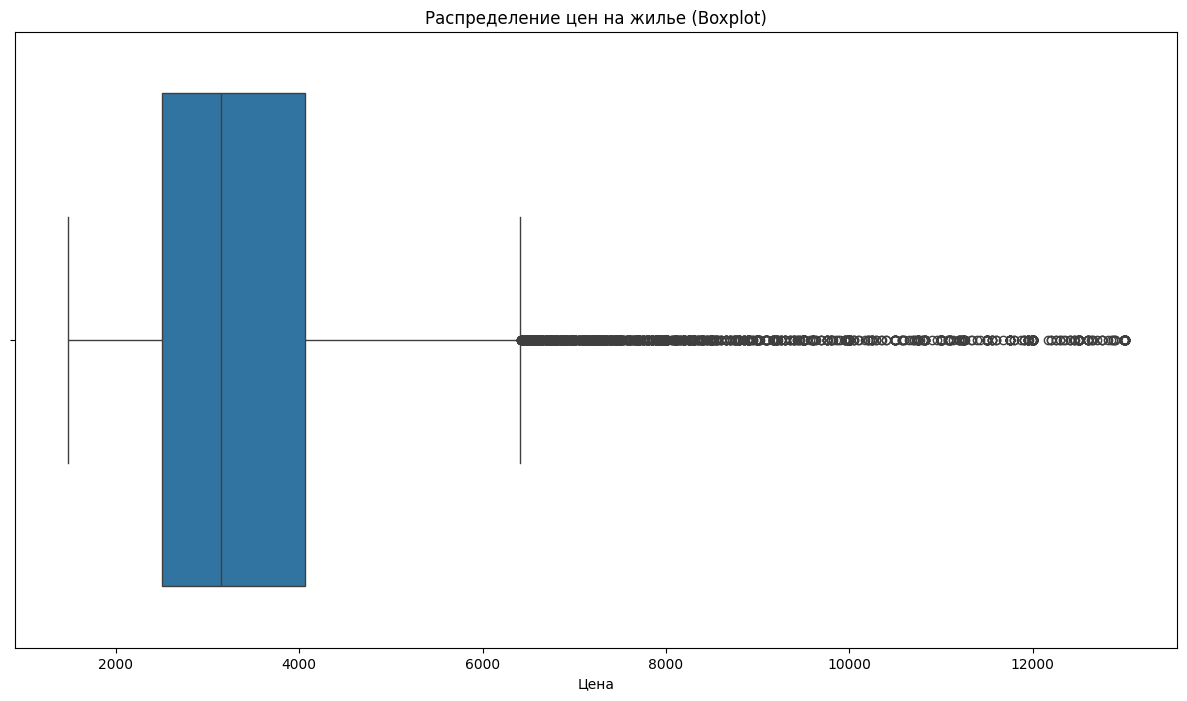

In [17]:
sns.boxplot(x=df_filtered['price'])
plt.xlabel('Цена')
plt.title('Распределение цен на жилье (Boxplot)')
plt.show()

На этой диаграмме более наглядно, что большая часть сосредоточена от 2500 до 4100

## 2.2 Анализ характеристик

### Определение типа столбца 'interest_level'

In [18]:
print(f'Тип столбца "interest_level" - {df_filtered['interest_level'].dtype}')

Тип столбца "interest_level" - object


Т.е. он хранит строковые данные

### Получение всех уникальных значений столбца и их количества

In [19]:
df_filtered['interest_level'].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

### Расшифровка значений (приведение значений к числовым показателям)

In [20]:
new_interest_values = {
    'low': 0,
    'medium': 1,
    'high': 2}
df_filtered.loc[:, 'interest_level'] = df_filtered['interest_level'].replace(new_interest_values)
df_filtered

C:\Users\olegv\AppData\Local\Temp\ipykernel_17616\4082948830.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.loc[:, 'interest_level'] = df_filtered['interest_level'].replace(new_interest_values)


,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795
...,...,...,...,...
124000,1.0,3,0,2800
124002,1.0,2,1,2395
124004,1.0,1,1,1850
124008,1.0,2,1,4195


### Построение гистограмм для 'bathrooms' и 'bedrooms'

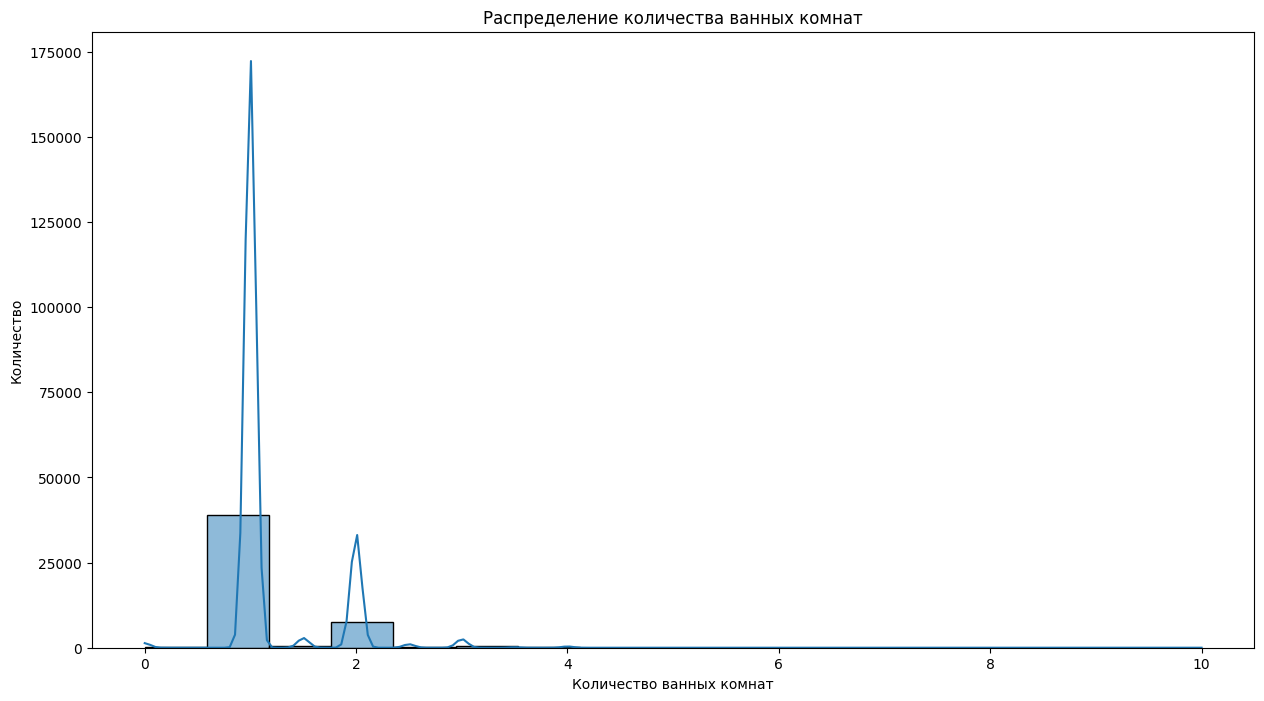

In [21]:
sns.histplot(df_filtered['bathrooms'], kde=True)
plt.xlabel('Количество ванных комнат')
plt.ylabel('Количество')
plt.title('Распределение количества ванных комнат')
plt.show()

В большей части квартир 1 ванная комната, иногда 2, очень редко 3, еще реже 4, более 4 считаю выбросами

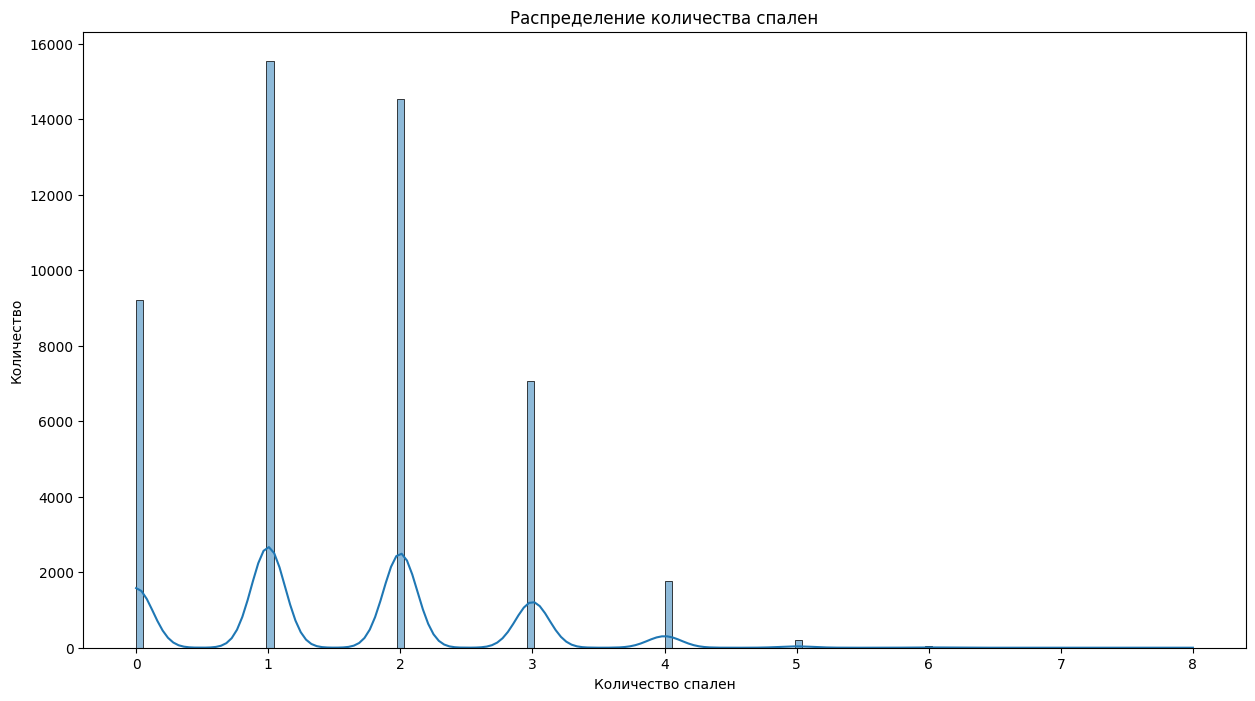

In [22]:
sns.histplot(df_filtered['bedrooms'], kde=True)
plt.xlabel('Количество спален')
plt.ylabel('Количество')
plt.title('Распределение количества спален')
plt.show()

В большей части квартир 1 или 2 спальных комнаты, также присутствуют квартиры где нет ни одной спальни или их 3, 5 спален встречаются очень редко, 6 почти не встречаются, более 6 считаю выбросами

## 2.3 Комплексный анализ

### Построение тепловой матрицы корреляции

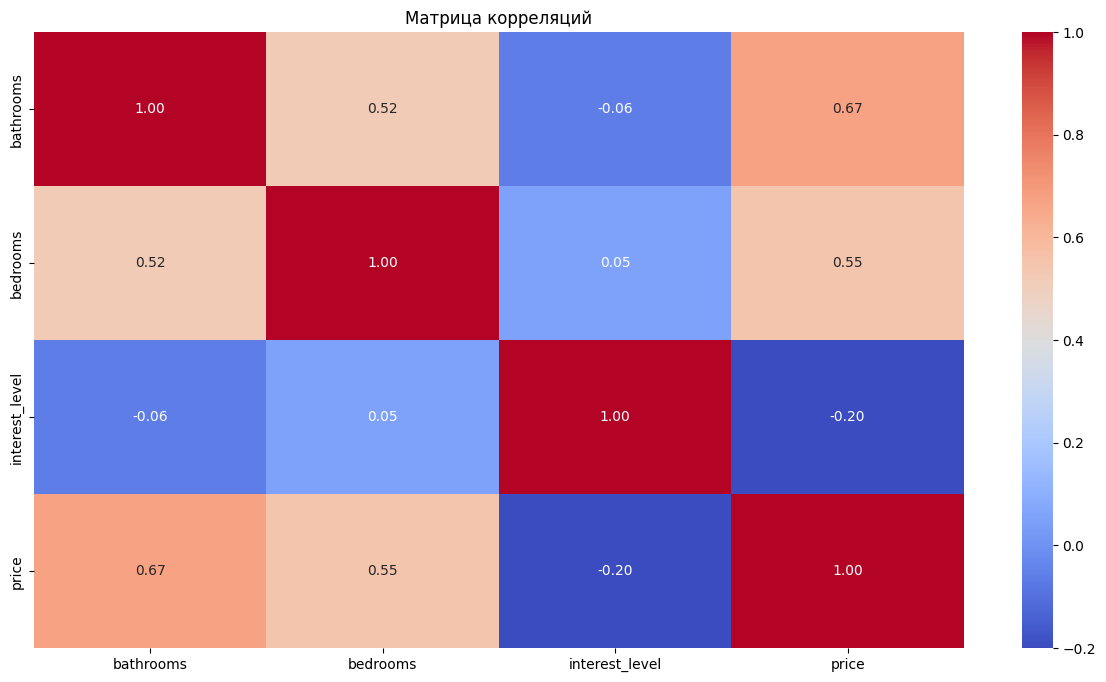

In [23]:
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Имеется положительная корреляция между количеством ванных комнат и ценой и количеством спален и ценой, 0.67 и 0.55 соответственно. Также имеется корреляция между количеством ванных комнат и количеством спален - 0.52

### Построение диаграммы рассеивания для визуализации корреляции

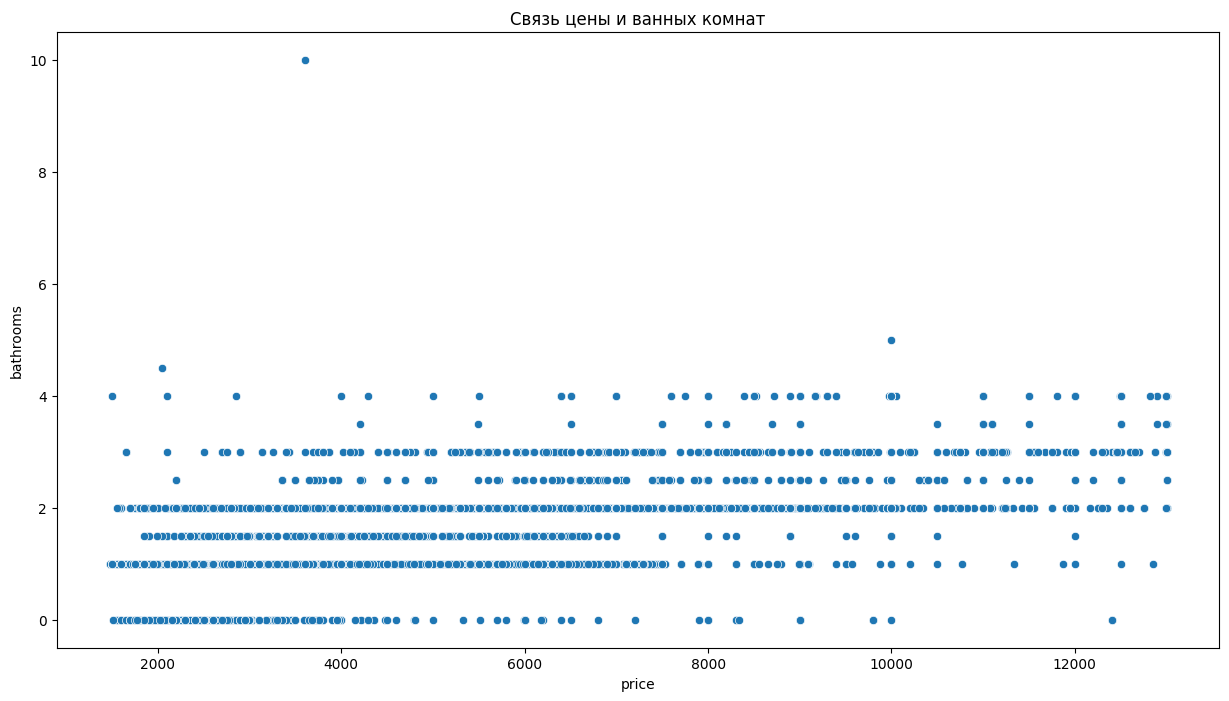

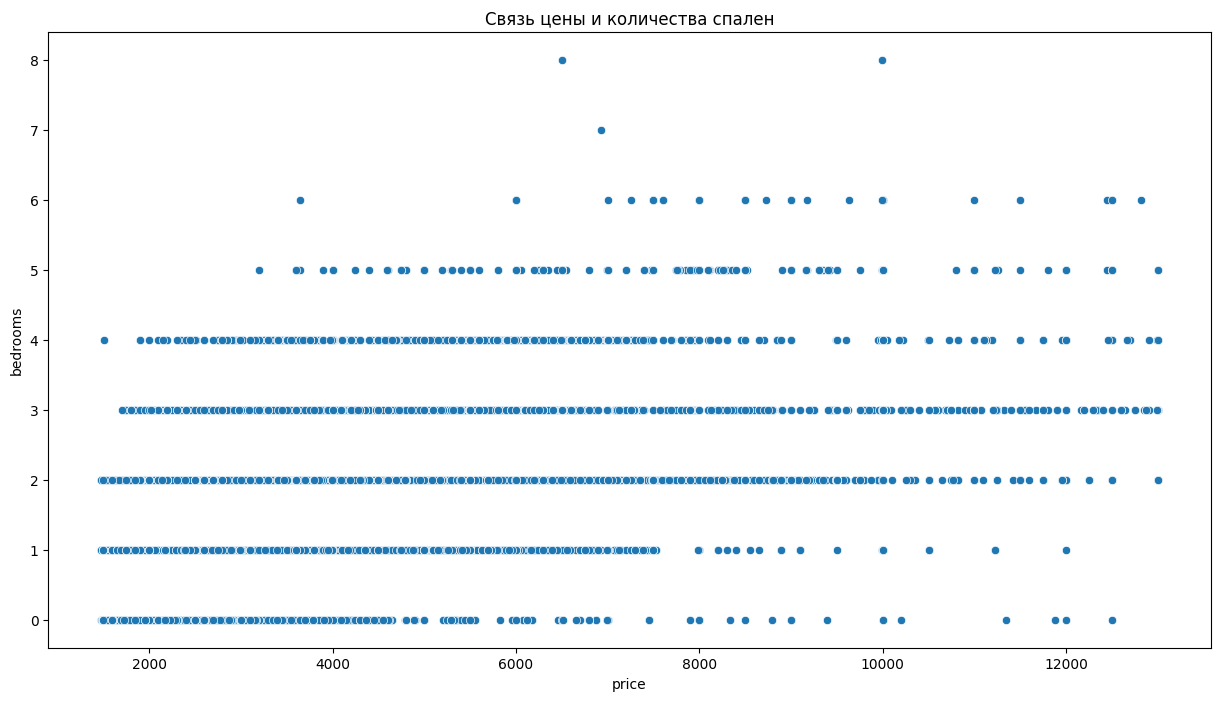

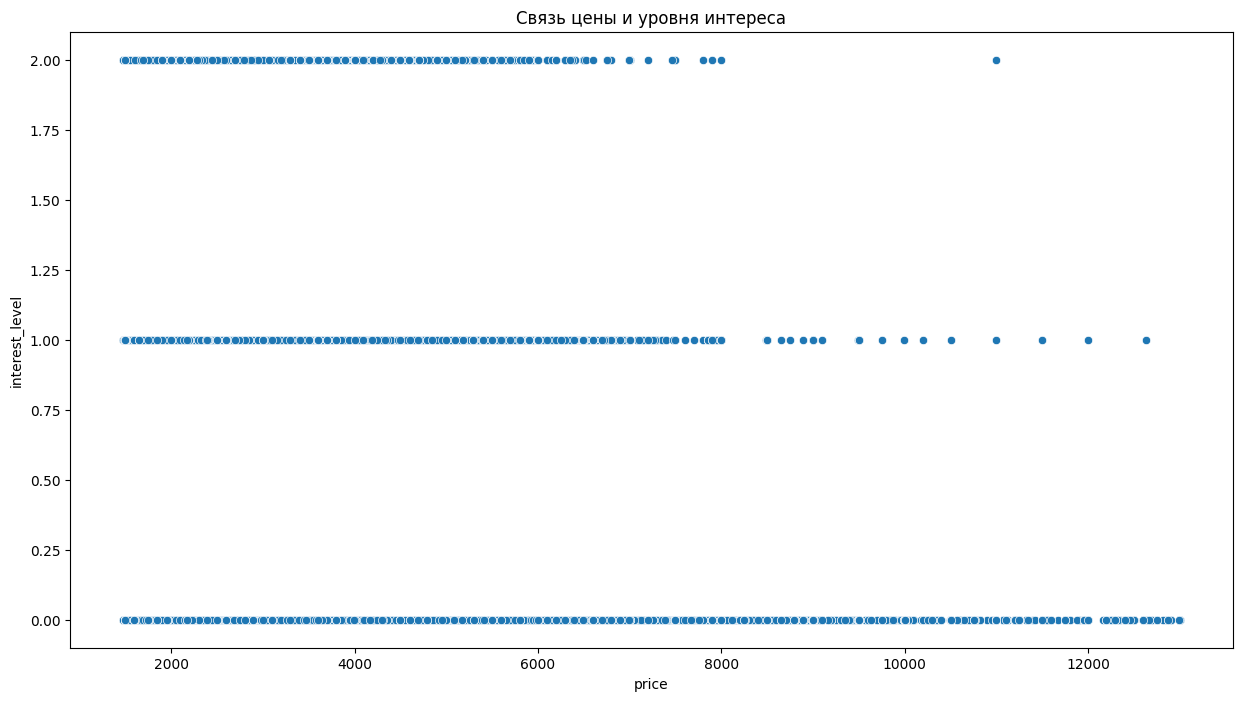

In [24]:
sns.scatterplot(x=df_filtered['price'], y=df_filtered['bathrooms'])
plt.title('Связь цены и ванных комнат')
plt.show()

sns.scatterplot(x=df_filtered['price'], y=df_filtered['bedrooms'])
plt.title('Связь цены и количества спален')
plt.show()

sns.scatterplot(x=df_filtered['price'], y=df_filtered['interest_level'])
plt.title('Связь цены и уровня интереса')
plt.show()

# 3. Создание функций

## 3.1 Добавление новых признаков

### Три новых признака - это квадраты 'bathrooms, 'bedrooms' и 'interest_level'

In [25]:
df_filtered2 = df_filtered.assign(
    bathrooms_squared=df_filtered['bathrooms'] ** 2,
    bedrooms_squared=df_filtered['bedrooms'] ** 2,
    interest_level_squared=df_filtered['interest_level'] ** 2
)

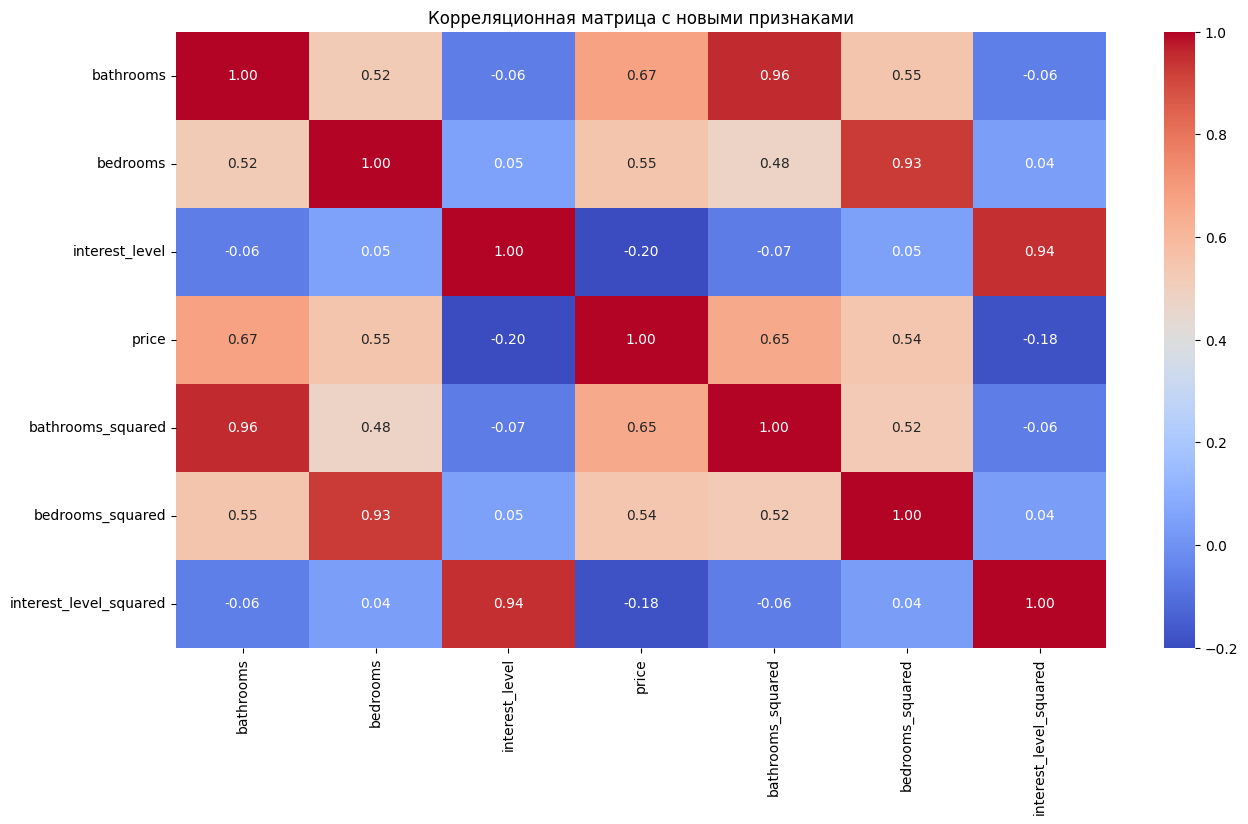

In [26]:
sns.heatmap(df_filtered2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица с новыми признаками')
plt.show()

Новые признаки не стали более коррелируемыми с целью, чем базовые

## 3.2 Разделение данных на обучающие и тестовые

In [27]:
X = df_filtered.drop(['interest_level', 'price'], axis=1)
y = df_filtered['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 3.3 Инициализация PolynomialFeatures()

In [28]:
polyfeat = PolynomialFeatures(degree=10)

## 3.4 Преобразование данных

In [29]:
X_train_polyfeat = polyfeat.fit_transform(X_train)
X_test_polyfeat = polyfeat.transform(X_test)

# 4. Обучение 3 моделей: линейная регрессия, дерево решений и нативная модель

## 4.1 Создание таблиц результатов

In [30]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

## 4.2 Линейная регрессия

### Инициализация линейной регрессии

In [31]:
lr_model = LinearRegression()

### Обучение модели и предсказания

In [32]:
lr_model.fit(X_train_polyfeat, y_train)

y_train_pred_lr = lr_model.predict(X_train_polyfeat)
y_test_pred_lr = lr_model.predict(X_test_polyfeat)

### Вычисление средней абсолютной ошибки (MAE)

In [33]:
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)

### Вычисление среднеквадратической ошибки (RMSE)

In [34]:
rmse_train_lr = mean_squared_error(y_train, y_train_pred_lr) ** 0.5
rmse_test_lr = mean_squared_error(y_test, y_test_pred_lr) ** 0.5

### Добавление вычисленных метрик в таблицы result_MAE и result_RMSE

In [35]:
result_MAE.loc[len(result_MAE)] = ['linear_regression', mae_train_lr, mae_test_lr]
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', rmse_train_lr, rmse_test_lr]

## 4.3 Дерево решений

### Инициализация регрессионного дерева решений

In [36]:
tree_model = DecisionTreeRegressor(random_state=42)

### Обучение модели и предсказания

In [37]:
tree_model.fit(X_train_polyfeat, y_train)

y_train_pred_tree = tree_model.predict(X_train_polyfeat)
y_test_pred_tree = tree_model.predict(X_test_polyfeat)

### Вычисление средней абсолютной ошибки (MAE)

In [38]:
mae_train_tree = mean_absolute_error(y_train, y_train_pred_tree)
mae_test_tree = mean_absolute_error(y_test, y_test_pred_tree)

### Вычисление среднеквадратической ошибки (RMSE)

In [39]:
rmse_train_tree = mean_squared_error(y_train, y_train_pred_tree) ** 0.5
rmse_test_tree = mean_squared_error(y_test, y_test_pred_tree) ** 0.5

### Добавление вычисленных метрик в таблицы result_MAE и result_RMSE

In [40]:
result_MAE.loc[len(result_MAE)] = ['decision_tree', mae_train_tree, mae_test_tree]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', rmse_train_tree, rmse_test_tree]

## 4.4 Нативная модель

### Вычисление среднего значения и медианы цен

In [41]:
train_mean = y_train.mean()
test_mean = y_test.mean()

train_median = y_train.median()
test_median = y_test.median()

### Вычисление средней абсолютной ошибки (MAE)

In [42]:
mae_train_mean = mean_absolute_error(y_train, [train_mean] * len(y_train))
mae_test_mean = mean_absolute_error(y_test, [test_mean] * len(y_test))

mae_train_median = mean_absolute_error(y_train, [train_median] * len(y_train))
mae_test_median = mean_absolute_error(y_test, [test_median] * len(y_test))

### Вычисление среднеквадратической ошибки (RMSE)

In [43]:
rmse_train_mean = mean_squared_error(y_train, [train_mean] * len(y_train)) ** 0.5
rmse_test_mean = mean_squared_error(y_test, [test_mean] * len(y_test)) ** 0.5

rmse_train_median = mean_squared_error(y_train, [train_median] * len(y_train)) ** 0.5
rmse_test_median = mean_squared_error(y_test, [test_median] * len(y_test)) ** 0.5

### Добавление вычисленных метрик в таблицы result_MAE и result_RMSE

In [44]:
result_MAE.loc[len(result_MAE)] = ['native_mean', mae_train_mean, mae_test_mean]
result_RMSE.loc[len(result_RMSE)] = ['native_mean', rmse_train_mean, rmse_test_mean]

result_MAE.loc[len(result_MAE)] = ['native_median', mae_train_median, mae_test_median]
result_RMSE.loc[len(result_RMSE)] = ['native_median', rmse_train_median, rmse_test_median]

## 4.5 Сравнение результатов

In [45]:
result_MAE

,model,train,test
0,linear_regression,756.726510,759.829898
1,decision_tree,756.704419,753.951417
2,native_mean,1140.445303,1134.133499
3,native_median,1087.459008,1081.216618


In [46]:
result_RMSE

,model,train,test
0,linear_regression,1079.066347,1247.298979
1,decision_tree,1078.967775,1073.751315
2,native_mean,1598.460491,1594.366370
3,native_median,1645.459174,1639.336503


Из полученных данных можно сделать следующие выводы:
- Ни одна модель не переобучилась
- По RMSE лучшая модель - дерево решений
(выбрал по RMSE, а не по MAE, так как RMSE более чувствителен к выбросам)
- Нативные модели работают значительно хуже, следовательно, другие модели действительно находят закономерности в данных и предсказывают лучше, чем простое усреднение